<a href="https://colab.research.google.com/github/6X10/advanced-statistical-data-analysis/blob/main/SVM_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(1000, 4)
(1000, 3)
(1000,)


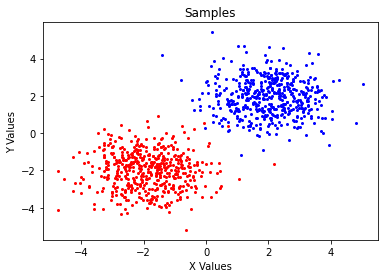

In [ ]:
#### Toy Data ####

num_sample = 500

data0 = np.random.randn(num_sample,2) + (2,2) #(2,2) 근처에서 가우시안 분포로 뽑을 것
data1 = np.random.randn(num_sample,2) + (-2,-2) #(-2,-2) 근처에서 가우시안 분포로 뽑을 것

data0 = np.hstack([data0,np.ones((num_sample,1),dtype=float),np.ones((num_sample,1),dtype=float)]) #bias term까지 고려해서 계산하기 위해서 1로 된 labe 붙여줌. ax1+bx2+c -> (a,b,c)•(x1,x2,1) 로 표현하므로, 뒤에거를 만들어주기 위해서 1을 더해줄 것 when (a,b,c)=w.
data1 = np.hstack([data1,np.ones((num_sample,1),dtype=float),-np.ones((num_sample,1),dtype=float)]) #(2,2) 근처에서 뽑은 애는 +1이라는 label을, (-2,-2) 근처에서 뽑은 애는 -1이라는 label을

data = np.vstack([data0,data1]) #X1,X2,1,y(label) 순서로 되어 있음

print(data.shape)

#X,Y 값 분리
X = data[:,:3]
Y = data[:,3]

print(X.shape)
print(Y.shape)

plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data0[:,0],data0[:,1],s=4,color="b")
plt.scatter(data1[:,0],data1[:,1],s=4,color="r")
plt.show()
#randomness 존재해서 완벽하게 구분되는 data point 뽑힐 수도 있고, 지금처럼 약간 섞인 데이터 포인트 뽑일 수도ㅇ

In [ ]:
#soft margin SVM linear DB 찾기
#objective function minimize하는 문제 -> SGD로 풀기!
class SVM:
    def __init__(self, lam, lr, X, Y): #input parameter
        self.lam = lam # lamda: penalty scale(새롭게 loss function 정의할 때, 새롭게 붙는 penalty term의 scale하는 parameter)
        self.lr = lr # learning rate (for SGD)
        self.X = X # training data input
        self.Y = Y # training data label
        # X.shape = (1000,3)
        self.W = np.random.randn(X.shape[1]) #w paramter initialize with standard gaussian. (X.shape의 첫번째 dimension에 맞게)
        self.num_data = X.shape[0]
        print("SVM initialized..")

    def constraint(self, x, y):
      return y*np.dot(x,self.W) #>= 1: 맞춘 거, 0~1: margin 안에 떨어지고, 0<= 틀린 거

    #hinge loss
    def slack(self, x,y):
        return 1. - self.constraint(x,y) # 1-contraint as slack variable
    #13p, objective function: minw ||w||^2+lamda~

    # data instance-wise loss and hit computation
    def compute_loss_and_hit(self, x, y):
      hinge_loss = np.maximum(self.slack(x,y), 0.)
      loss = np.sum(np.multiply(self.W, self.W))+self.lam*hinge_loss #objective function = w에 대한 (L-2 norm의 square:w의 innerproduct)+(hingeloss)*(scale parameter)
      if self.constraint(x,y) <=0:
        hit=False
      else: #0~1도 엄밀히 말하면 틀린 건 아니므로.
        hit=True
      return loss, hit

    #하나의 데이터 instance 들어갔을 때 gradient 어떻게 되는지
    #case 2가지. hingeloss -> 0 (slack<0), hingeloss>0 (slack>=0)
    #엄밀히 따지면 hinge loss가 (14pg 그림)처럼 1이라는 값에서 미분가능하지 않음 -> 정확하게 이 값 equal 1 나오는 순간 컴퓨터에게 그렇게 많지 않을 것이므로 무시
    #1이라는 값 왼쪽에서는 미분 가능한데 -1 나오고, 1이라는 값 오른쪽에서는 미분 가능한데 0 나옴.
    def compute_gradient(self, x, y):
      if self.slack(x,y) <= 0: #뒤에 term 죽음
        grad_w = 2*self.W #dloss/dw = 2*w
      else: #hingeloss 살아남음
        grad_w = 2*self.W - (self.lam*x*y)
      return grad_w

    # optimize self.W with simple SGD, i.e., mini batch_size=1
    # also, compute total loss and training accuracy of current epoch
    def fit(self,num_epoch):
        for epoch in range(num_epoch):
            total_loss=0 #epoch에서의 total loss
            count=0 #epoch에서의 count
            perm = np.random.permutation(self.num_data) #SGD 쓸거니까 데이터 shuffling 해줘야.
            for ind in range(self.num_data): #한번에 하나씩만 대입하는 minibatch size=1 SGD 사요 .
              loss, hit = self.compute_loss_and_hit(self.X[perm[ind]], self.Y[perm[ind]]) #데이터 shuffling을 고려한 index를 X,Y에 넣음
              grad_w = self.compute_gradient(self.X[perm[ind]], self.Y[perm[ind]])
              self.W= self.W - (self.lr * grad_w) #w update
              total_loss += loss
              count += hit
            accuracy = count/self.num_data #맞춘 횟수/전체 데이터수
            if epoch % 100 == 0:
                print("Epoch: %d, Loss: %.2f, Accuracy: %.3f"%(epoch, total_loss, accuracy)) #현재 Epoch에서의 total loss(or average loss)와 accuracy

In [ ]:
model = SVM(lam=0.1,lr=1e-5,X=X,Y=Y)

SVM initialized..


In [ ]:
model.fit(num_epoch=1000)

Epoch: 0, Loss: 1906.06, Accuracy: 0.004
Epoch: 100, Loss: 114.37, Accuracy: 0.004
Epoch: 200, Loss: 81.55, Accuracy: 0.996
Epoch: 300, Loss: 80.95, Accuracy: 0.996
Epoch: 400, Loss: 80.94, Accuracy: 0.996
Epoch: 500, Loss: 80.94, Accuracy: 0.996
Epoch: 600, Loss: 80.94, Accuracy: 0.996
Epoch: 700, Loss: 80.94, Accuracy: 0.996
Epoch: 800, Loss: 80.94, Accuracy: 0.996
Epoch: 900, Loss: 80.94, Accuracy: 0.996


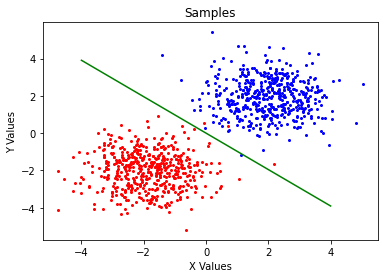

In [ ]:
#linear D.B
plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data0[:,0],data0[:,1],s=4,color="b")
plt.scatter(data1[:,0],data1[:,1],s=4,color="r")
plt.plot([-4, +4], [-(model.W[0]*(-4)+model.W[2])/model.W[1], -(model.W[0]*(+4)+model.W[2])/model.W[1]],color="g")
plt.show()